<center><h1>PHYS 2005L Lab:</h1></center>
<center><h1>Air Resistance</h1></center>

<h2>Introduction</h2>
When we dropped the balls to measure g in the previous lab, we assumed that the effect of air resistance on them was negligible. However, this is probably not a good assumption, particularly for the lightest balls.
This week we try to take air resistance into account.
<br>
Air resistance is often neglected in introductory physics courses, but in real life air resistance is often an important force on an object. More than 80% of the work done by a bicyclist moving at 25 miles/hour goes into overcoming the effects of air resistance. Bicycle racers riding time trials wear special helmets and clothing to make them more aerodynamic and thus decrease the effect of air resistance.
A pdf with some additional material on air resistance, from the textbook "Classical Mechanics" by J Taylor, has been uploaded to the Canvas site (Files->Supplementary Material), if you would like to read some more. 

<h2>The Physics of Air Drag</h2>

The force due to air resistance increases the faster an object is moving -  it is a *velocity-dependent* force.
For the objects and typical speeds that we consider in the Freefall lab, the dominant type of air resistance is known as *quadratic drag*, because it depends on the square of the object's velocity. 
(You will learn later in your physics career about a different type of air resistance which depends linearly on the velocity, but is only significant for very small/very slow objects)

Quadratic air resistance is also found to depend on the cross-sectional area of the moving object, and on the density of the medium through which it moves (a more dense medium imposes a larger resistance, as you would expect). Thus we can write:

$$F_{quad} = (c \rho A)v^2 $$

where $\rho$ is the density of air, $A$ is the cross sectional area of the object, and $c$ is the *drag coefficient*. 

<!-- Discuss what c depends on? -->
<!-- Notice that $c$ is dimensionless.  -->

If we consider a body falling freely under the influence of gravity, the force of air resistance will be in the upward direction (like friction, air resistance opposes the direction of motion). 

As the object falls under gravity, it's velocity increases, and as a result the air resistance increases too. At some point, the drag force will become large enough that it will be equal in magnitude (and opposite in direction) to the gravitational force on the object. At that point, there will be no net force, and thus the object will stop accelerating and just continue to fall with constant velocity. We call this the *terminal velocity* ($v_T$)

### Exercise: Find an Expression for the Terminal Velocity

By considering the above definition, show that the terminal velocity is given by:
$$ v_T = \sqrt{\frac{mg}{c \rho A}} $$


<!-- We will calculate the terminal velocity for the lead filled ball, the tennis ball and the nerf ball from last week's lab. -->
    

<h3>The Equations of Motion</h3>

We will consider an object dropped from rest and falling under gravity, such that the initial velocity is zero, and the velocity is considered to be positive going downward. 
The gravitational force $mg$ is obviously downward, and we will take this to be the positive direction.  The force of air resistance is upward and therefore negative, in this choice of axis. 
Thus Newton's second law $F_{net}=ma$ gives

$$ma = m\frac{dv}{dt} = mg - c \rho A v^2$$

since $a = \frac{dv}{dt}$. 

This is a *differential equation*, because the change in the velocity (LHS) is related to a function of the velocity (RHS). 


The solution to this differential equation is that the velocity as a function of time $v(t)$ satisfies:

$$ v(t) = v_T \tanh \left(\frac{gt}{v_T} \right)  $$

where the *hyperbolic tangent* function $\tanh x = \frac{\sinh x}{\cosh x} = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
and $v_T$ is the terminal velocity defined above.



### Extra Credit Exercise - Verify the Solution to the Above

Solving a differential equation yourself is beyond the scope of what we ask you to do in this course. However, if you are given the solution already, it is relatively straightforward to verify that this is indeed a valid solution. One does this by evaluating explicitly the left-hand and right-hand sides of the differential equation separately, and showing that they are indeed equal to each other.
So you can do this here, in a couple of steps, for some extra credit.
(You may want to come back to this exercise later, and move on through the rest of the Notebook first)

1. Given the definiton of $\tanh x$ above, show by explicit calculation that the derivative is given by:

$$ \frac{d \tanh x}{dx} = 1 - \tanh^2 x $$

2. Using this, find the derivative $dv/dt$ for the $v(t)$ expression given above

3. Now calculate the left-hand side of the above differential equation and show that it is indeed equal to the right-hand side, provided that $v(t)$ is given by the above expression. 


### Exercise: Explore the tanh/velocity function

1. Using the **numpy** python library, plot the function tanh(x)  (use *numpy.tanh*) for x from 0 to 10. What do you notice about this function that could be related to describing velocity as a function of time in the case of air resistance?

2. Now plot $tanh(ax)$ for the same $x$ range, where $a$ is a numerical parameter, for 3 cases: a=0.3, 0.5 and 2.0. 
Describe briefly the difference you observe as you change the value for $a$

3. Consider a ball dropped from rest and falling freely under gravity with no air resistance. Now consider another ball dropped from rest and falling, but with air drag such that its terminal velocity is 50 m/s. What is the value of the velocity in each case (a) after 1 s? (b) after 2s? c) after 5s? (d) after 10s?
Comment briefly on what you observe from these values.






In [31]:
# Example: use tanh function from numpy library

import numpy as np

x1=1
y1 = np.tanh(x1)
print(x1,y1)

1 0.7615941559557649


### Position

Now, in the Freefall lab, we didn't measure velocity, we measured the position/height. 
For this air drag case, we can integrate the velocity expression above to get the distance travelled through time $t$.
We will need the result that the integral of $\tanh x$ is:
$$ \int \tanh x = \ln \cosh x $$

The result is that the distance fallen as a function of time $x(t)$ is given by:

$$ x(t) = \frac{v_T^2}{g} \ln \cosh \left( \frac{gt}{v_T} \right) $$

Note that this is not the height of the object but rather the *distance fallen*, so $x(t)$ starts at zero and increases as the object falls.

### Exercise: Compare Distance Travelled in Drag vs No-drag Case

1. Plot x(t) as a function of time from 0 to 1 s, for two cases:
    (a) when the terminal velocity = 5 m/s
    (b) when the terminal velocity = 10 m/s
    
2. Work out the distance fallen as a function of time in the case where there is no air resistance (assume the object is dropped from rest), and plot it on the same axes as the above.
Comment briefly on what you observe




### Analysing Real Data from Freefall Lab

Now we will use the ball-drop data recorded in the last lab, to do a more detailed analysis
First, read in the data from the CSV file, as done last time
(A hint here: finding the path to the CSV file can be made easier by simply copying the CSV file into the same directory where the Notebook is running, and then one only needs to give the filename, not a path)

Note also that the Freefall data measured position in terms of height above the ground, while the air drag function above is in terms of distance travelled from the starting point, so these are different quantities. 
Probably the most convenient way to handle this is to convert the Height information into a Distance Travelled (ie start from zero, and increase as time progresses)

### Finding the Terminal Velocity from the Data

Now one can plot the data, fit the air-drag function to it, and get a value for the terminal velocity of each ball.
You should see that when the effect of air resistance is larger, the terminal velocity is a smaller number.

**Note** that one may also find that in cases where the effect of air resistance is small, the value of vT extracted from the fit can have a large uncertainty

In the Freefall lab, we only needed to fit a quadratic function to the data, and the *polyfit* function
But here we will need a more complicated function for the position including the effect of air drag

For this case, it will be better to use the *curve_fit()* function that is provided by the **scipy** (Scientific Python) library. 
The Reference document includes an example of how to use *curve_fit()*, and we show an example also below. This example also shows how to get and interpret the results of *curve_fit()*

You should define the appropriate function to fit with, and construct it so that the fit will return the best value for the *terminal velocity* $v_T$ from the data for each ball. As the example below shows, it will also be useful to get the error on this best value from the fit, as in cases where this error might be large (relative to $v_T$ itself), then perhaps we do not rely heavily on it.



[10.02112403]
[[0.00059579]]
0.02440885000522135


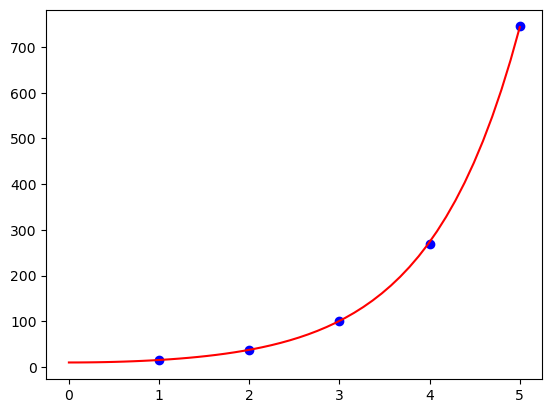

In [39]:
x_example = [1,2,3,4,5]
y_example = [15.4,37.7,101,270,745]

import matplotlib.pyplot as plt
plt.plot(x_example,y_example,'ob')

# here is how we could fit a quadratic function (polynomial of degree 2) to this data
#import numpy as np
#fit_results = np.polyfit(x_example,y_example,deg=2)
#print(fit_results)
# the fit_results here is a list of the fitted polynomial coefficients, in order of largest powers
# so for degree=2, this will return [a,b,c] in the fitted ax^2 +bx +c
# we can get the values separately as fit_results[i]:
#print("Fitted param a = ",fit_results[0])


# But really we want to use curve_fit for the more complicated air drag function

#for curve fit
from scipy.optimize import curve_fit

import numpy as np

    # first we define the function that we will use for the fit
# the first argument to this function should be the variable at which we will evaluate the function, ie the x in f(x)
# then, this function will use some *parameters*. These should be the next arguments to the function, ie param1  below
def function_to_fit(x,param1):
    y = param1*np.cosh(x)
    return y

# now when we go to fit using this defined function, the fit will find for us
# the best value for the unknown parameter(s)

# we call curve_fit() as follows:
# curve_fit(function_to_fit,x_data,y_data)

curve_fit_results, cov = curve_fit(function_to_fit,x_example,y_example)
# Here curve_fit_results (first value returned from curve_fit() function ) is
# a list of the values of the fitted parameters - in our case, just one parameter param1
print(curve_fit_results)
# and cov ,the second return value from curve_fit(), is
# the covariance matrix of the fit parameters
# We dont need to worry too much about what is the covariance matrix
# but what is useful in our case is that the sqrt of the first element of this
# will be the uncertainty on the fitted first parameter value
print(cov)
print(math.sqrt(cov[0]))


# to plot the fitted curve
# one way is to use the function def, with the curve_fit_results parameters
# and create a y_display dataset to plot
x_display = np.linspace(0,5)
y_display = []
for x in x_display:
    y_display.append(function_to_fit(x,curve_fit_results[0]))

# then one could plot y_display vs x_display in the usual way

# Alternatively, one can use the function *directly* with the curve_fit_results, as follows:
plt.plot(x_display,function_to_fit(x_display,*curve_fit_results),'r')
plt.show()



### Finding the Drag Coefficient

Now that we know vT for each ball, we can try to calculate the drag coefficient $c$ for each one, since we have also measured the mass and diameter of each ball. 
Use this information and the formula given above for $v_T$ to find $c$ for each ball.

Note that for the heavier balls, there may have been a large uncertainty on the vT value extracted from the fit above, which may translate to unreliable values for $c$.

In principle, for a perfect sphere, the drag coefficient should be exactly 0.25. How close did your values come to this?



### Extra Credit Exercise

How do we know that our results including air resistance are a more accurate description of the data than when we ignored it in the last lab?
Well, if we looked at the plots of both a quadratic function and the air drag function fit to the data for the two light balls, we might see by eye that one looks a better fit. But how do quantify this idea that one fit is better than another?
One way is to calculate the average deviation between the measured data points and the prediction from the fit evaluated at each point - if this average deviation quantity is smaller for the air-drag case than for the quadratic case, then it should be considered a better description of the data

Try to calculate these average deviations for the two lightest balls, and see if indeed you conclude that the air drag function gives a better fit. 
What about for the heavy(ish) balls?


## Assignment

The assignment for this lab is to submit a Notebook which includes your work for all the above Exercises (including the Extra Credit ones, if you do them), your analysis of air resistance, finding the terminal velocities and the determination of the drag coefficient for each ball. You should show the plots of the datasets and the functions fit to each one, as well as the parameter values extracted, and the calculations you performed. 
You do not need to write up a Lab Report for this lab.